<a href="https://colab.research.google.com/github/adrianhi/Mall_Customers-cluster/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/adrianhi/Mall_Customers-cluster/main/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.sample(n=15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
150,151,Male,43,78,17
194,195,Female,47,120,16
14,15,Male,37,20,13
83,84,Female,46,54,44
158,159,Male,34,78,1
58,59,Female,27,46,51
117,118,Female,49,65,59
52,53,Female,31,43,54
95,96,Male,24,60,52
161,162,Female,29,79,83


 Dividir a los clientes en grupos homogéneos (clústeres) basados en sus comportamientos de compra y características económicas.



Ingresos anuales y puntaje de gasto

In [14]:
#seleccionamos las columnas que usaremos para el analisis
X = df.iloc[:, [3,4]].values
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Veamos si tenemos datos atipicos

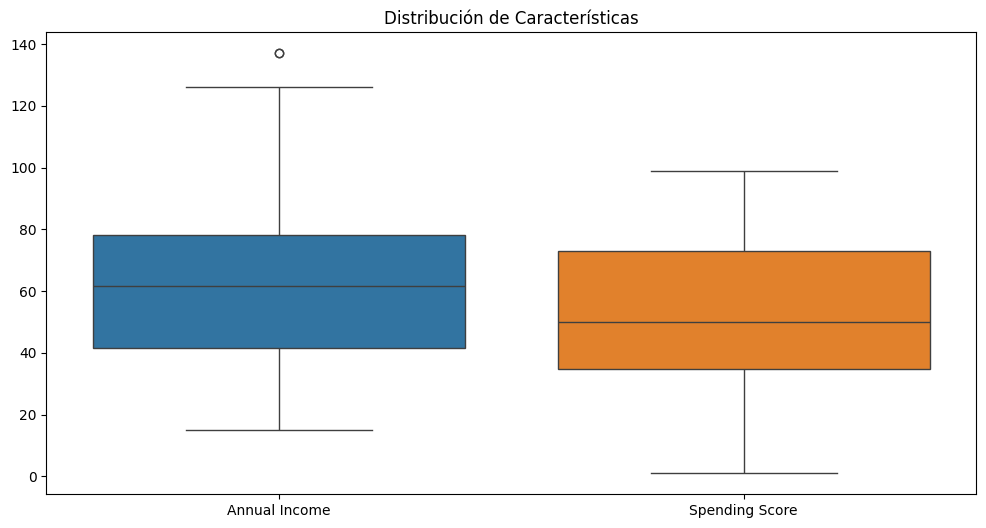

In [22]:
df_features = pd.DataFrame(X, columns=['Annual Income', 'Spending Score'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_features)
plt.title('Distribución de Características')
plt.show()

Mostraremos la relación entre la edad y el ingreso anual. Esto te permitirá ver si hay alguna tendencia o patrón discernible entre estas dos variables.

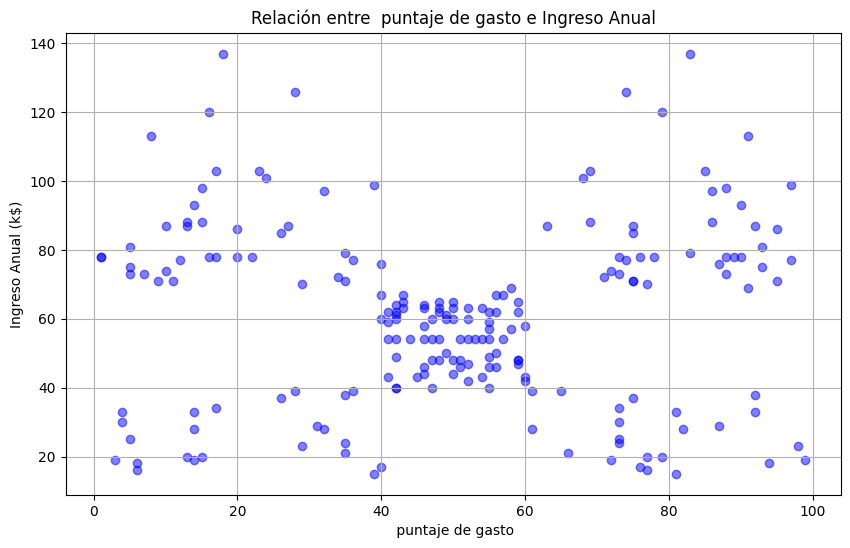

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], color='blue', alpha=0.5)
plt.title('Relación entre  puntaje de gasto e Ingreso Anual')
plt.xlabel(' puntaje de gasto')
plt.ylabel('Ingreso Anual (k$)')
plt.grid(True)
plt.show()

Observaremos una distribución de nuestras columnas a trabajar

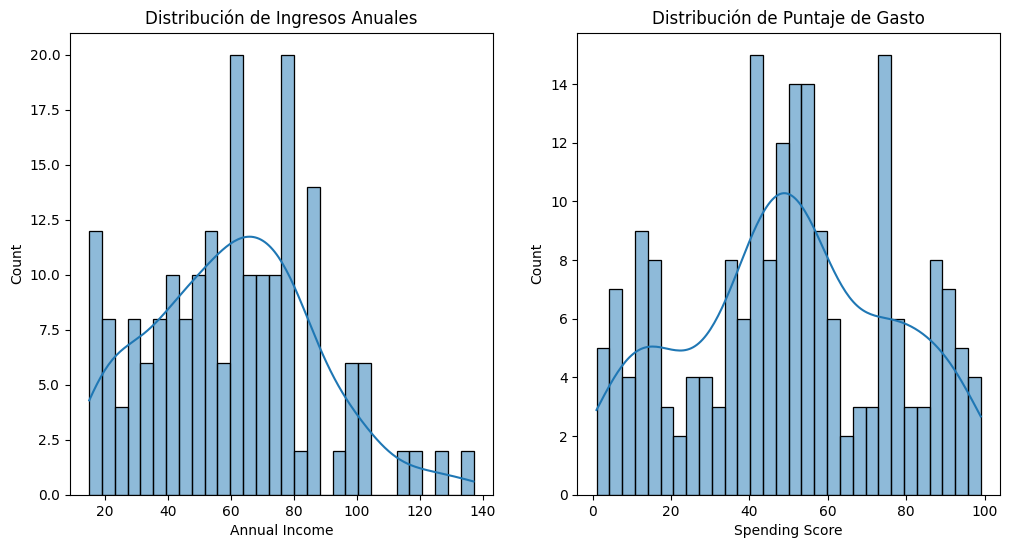

In [23]:
plt.figure(figsize=(12, 6))

# Histograma para Ingresos Anuales
plt.subplot(1, 2, 1)
sns.histplot(df_features['Annual Income'], bins=30, kde=True)
plt.title('Distribución de Ingresos Anuales')

# Histograma para Puntaje de Gasto
plt.subplot(1, 2, 2)
sns.histplot(df_features['Spending Score'], bins=30, kde=True)
plt.title('Distribución de Puntaje de Gasto')

plt.show()


In [8]:
df_encoded=pd.get_dummies(df, columns=['Gender'])
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

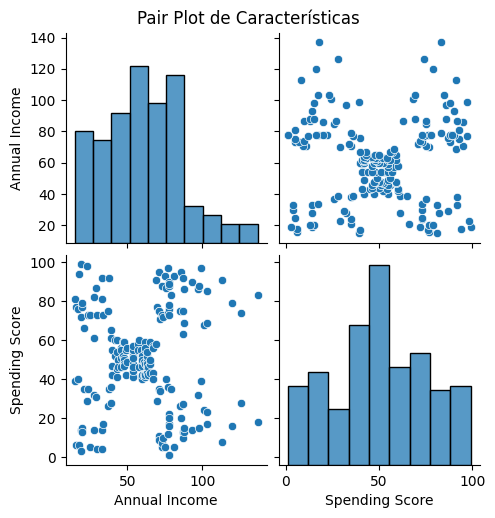

In [24]:
sns.pairplot(df_features)
plt.suptitle('Pair Plot de Características', y=1.02)
plt.show()

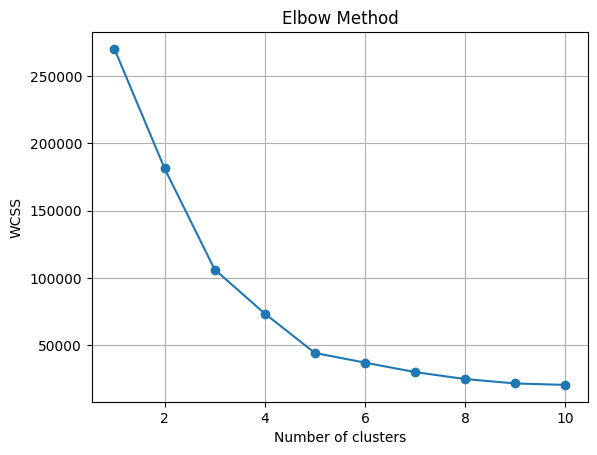

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )

In [27]:
y_kmeans = kmeans.fit_predict(X)

In [28]:
type(y_kmeans)

numpy.ndarray

In [29]:
df['cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [30]:
y_kmeans.dtype

dtype('int32')

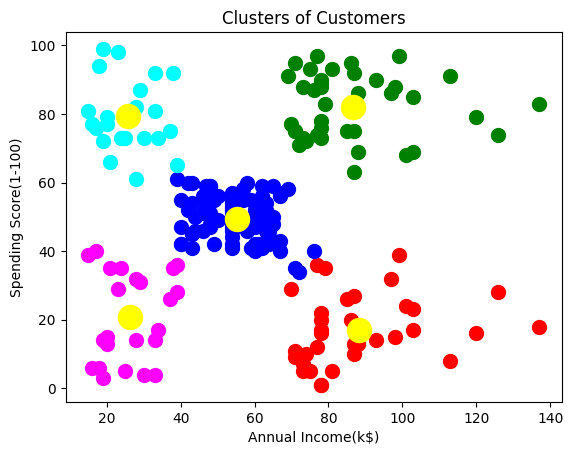

In [33]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

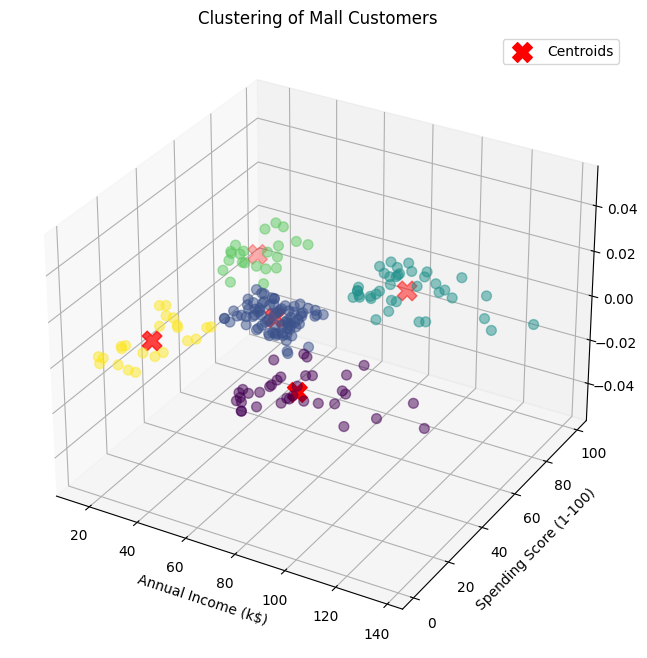

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Crear el modelo K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

plt.title('Clustering of Mall Customers')
plt.legend()

plt.show()

In [44]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=y_kmeans,
    mode='markers',
    marker=dict(size=5, color=y_kmeans, colorscale='Viridis', opacity=0.5),
    name='Data Points'
))
fig.add_trace(go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], z=[5]*len(kmeans.cluster_centers_),
    mode='markers',
    marker=dict(size=10, color='red', opacity=1, symbol='x'),
    name='Centroids'
))
fig.update_layout(scene=dict(xaxis_title='Annual Income (k$)', yaxis_title='Spending Score (1-100)', zaxis_title='Cluster'))
fig.update_layout(title='Clustering of Mall Customers')
fig.show()
